## 任务

In [13]:
import pandas as pd

import matplotlib.pyplot as plt

In [3]:
# 读取 CSV 格式文件“task_2_lianjia_data.csv”，将数据命名为 lianjia_data，并选取前部数据查看(阅读 参考文章 1、2);

lianjia_data = pd.read_csv('task_2_lianjia_data.csv')
lianjia_data.head(2)

,简介（方式·小区名 户型 朝向）,区,地铁站,村,面积大小（㎡）,朝向,户型,楼层类型,楼层（层）,标签
0,整租·长桥一村 1室0厅 南,徐汇,长桥,长桥一村,39,南,1室0厅1卫,高楼层,6,随时看房
1,整租·馨宁公寓 1室1厅 南,徐汇,华泾,馨宁公寓,42,南,1室1厅1卫,高楼层,29,"精装,随时看房"


In [29]:
# 利用 groupby 函数，以【面积大小(m²)】字段进行 groupby，统计各个面积下的【房源数量】情况(阅读参考 文章 3、4);

lianjia_data.groupby(['面积大小（㎡）'])['区'].agg(房源数量 = ('count'))

,房源数量
面积大小（㎡）,
7,1
9,3
10,1
11,1
12,1
...,...
152,1
155,1
162,1


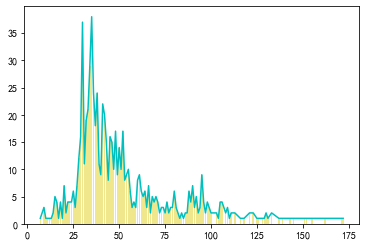

In [164]:
# 将第(2)问所统计数据，作折线图和条形图，并得出相关结论(阅读参考文章 5、6)，
# 提示:先提取第(2)问 所得数据表的 index 索引，饼转化成list;再提取【房源数量】的值转成 list(阅读参考文章 7、8);
data = lianjia_data.groupby(['面积大小（㎡）'])['区'].agg(房源数量 = ('count'))

data_dic = {'dimx':data.index.values, 'dimy':data.房源数量.values}

ax = plt.subplot(111)

ax.plot('dimx', 'dimy', 'c',data = data_dic)

ax.bar(data_dic['dimx'], data_dic['dimy'], color = 'khaki')

plt.show()

**结论**
1. 两种图形都可大致看出，面积在 30 至 50 平的房源数量占大多数；
2. 条形图可反映出房源面积分布的不连续性。面积大于 100 平方米的房源少，且面积规格分布更加不连续。

In [81]:
# 利用 groupby 函数，以【区】字段进行 groupby，统计各个上海各个“区”所属的【房源数量】情况;

lianjia_data.groupby(['区'])['村'].agg(房源数量 = ('count'))

,房源数量
区,
嘉定,6
奉贤,1
徐汇,126
普陀,22
杨浦,56
松江,45
浦东,106
虹口,24
长宁,86


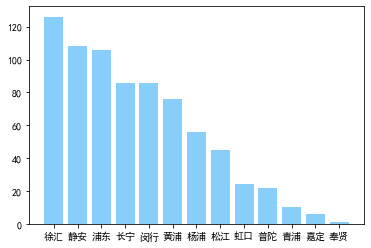

In [116]:
# 将第(4)问所统计数据，作条形图，并得出相关结论;

data = lianjia_data.groupby(['区'])['村'].agg(房源数量 = ('count')).sort_values(by = '房源数量', ascending = False)

data_dic = {'dimx':data.index.values, 'dimy':data.房源数量.values}

plt.bar(data_dic['dimx'], data_dic['dimy'], facecolor = 'lightskyblue')

plt.rcParams['font.sans-serif'] = ['SimHei']

plt.show()

**结论**

各区域的房源数量可以在图中看出，徐汇区最多，奉贤区最少。

In [119]:
# 利用 groupby 函数，以【楼层类型】字段进行 groupby，统计各个楼层所属的【房源数量】情况;

lianjia_data.groupby(['楼层类型']).区.agg(房源数量 = ('count'))

,房源数量
楼层类型,
中楼层,231
低楼层,146
地下室,5
高楼层,370


([<matplotlib.patches.Wedge at 0x2235273ac08>,
 [Text(-0.022975403556081526, 1.0997600332942798, '地下室'),
  Text(-0.6672044718785995, 0.8745502802613462, '低楼层'),
  Text(-0.8717552947227205, -0.6708522237593781, '中楼层'),
  Text(1.0996544534075032, 0.027569604658851724, '高楼层')],
 [Text(-0.012532038303317195, 0.5998691090696071, '0.7%'),
  Text(-0.36392971193378154, 0.4770274255970979, '19.4%'),
  Text(-0.4755028880305748, -0.3659193947778426, '30.7%'),
  Text(0.5998115200404562, 0.015037966177555484, '49.2%')])

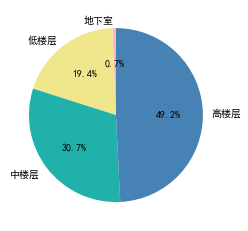

In [163]:
# 将第(6)问所统计数据，作饼图(阅读参考文章 9)，并得出相关结论。

data = lianjia_data.groupby(['楼层类型']).区.agg(房源数量 = ('count')).sort_values(by = '房源数量', ascending = True)

plt.pie(data.房源数量,
        labels = [i.strip() for i in data.index.tolist()],
        startangle = 90,
        colors=('lightpink', 'khaki', 'lightseagreen', 'steelblue'),
        autopct = '%.1f%%')

**结论**

高楼层房房源最多，占比 49.2%；地下室房源最少，占比 0.7%。